This chapter's problem sets depend on R code provided by McElreath in the book for the globe tossing example. I will implement in pymc3 then solve the problems

In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

In [2]:
from scipy import stats

In [3]:
np.random.seed(42)

In [4]:
# 9 globe tosses, 6 successes
data = np.array([1,0,1,0,1,1,1,0,1])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


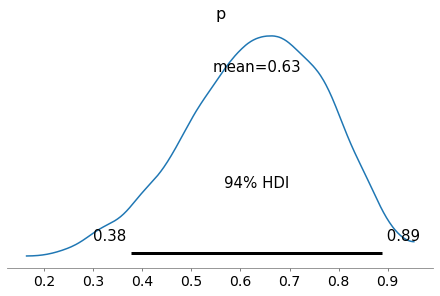

In [5]:
with pm.Model() as globe:
    p = pm.Uniform('p')
    likelihood = pm.Binomial('likelihood',n = 9, p = p, observed = 6)
    trace = pm.sample(1000, return_inferencedata = False)
    az.plot_posterior(trace)
#     az.plot_trace(trace)
#     az.plot_forest(trace, var_names=["p"])

In [6]:
# from https://github.com/pymc-devs/pymc-resources/blob/main/Rethinking_2/Chp_03.ipynb
# with pm.Model() as our_first_model:
#     p = pm.Uniform("p")  # set the prior
#     y = pm.Bernoulli("y", p=p, observed=data)  # set the posterior
#     trace = pm.sample(1000, chains=4)  # get 1000 random_samples
#     az.plot_posterior(trace)
#     az.plot_trace(trace)
#     az.plot_forest(trace, var_names=["p"])

Notice that the data could be modelled in 2 different ways: as Bernoulli or Binomial. However, the observed data provided to the model will have to be in a different shape for each:
- Bernoulli expects all the recorded trials (1 , 0 success and faliure)
- Binomial expects the summary statistics: n , k (num trials and num successes)

In [7]:
# can we do using grid approximation

p2 = np.linspace(start = 0, stop = 1, num = 1000)
prior = 1 #uniform prior
likelihood = stats.binom.pmf(k = 6, n = 9, p = p2)
posterior = prior * likelihood
posterior /= np.sum(posterior)

Text(0, 0.5, 'posetrior probability')

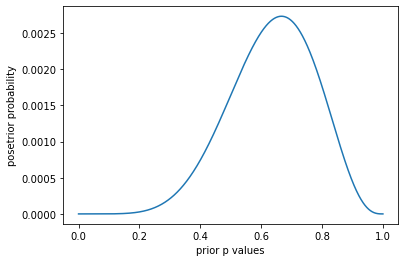

In [8]:
plt.plot(p2,posterior)
plt.xlabel('prior p values')
plt.ylabel('posetrior probability')
# plt.legend()

In [9]:
def ECDF(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

Use the values in samples to answer the questions that follow.

3E1. How much posterior probability lies below p = 0.2?

In [12]:
# solution using pymc3 model, will change with each run
samples = trace['p']
np.sum(samples<0.2) / len(samples)

0.00025

In [32]:
# sample from posterior that used grid approximation
# np.random.choice(where to sample from, probabilities of samples, size of sample, with/without replacement)
samples2 = np.random.choice(p2, p = posterior, size = 10000, replace = True )

In [33]:
sum(samples2<0.2)

7

In [34]:
np.sum(samples2<0.2) / len(samples2)

0.0007

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'p'}>

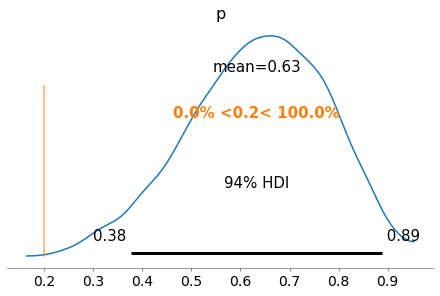

In [38]:
az.plot_posterior(trace, ref_val = 0.2)

3E2. How much posterior probability lies above p = 0.8?

In [36]:
#Ans using the grid approximation
np.sum(samples2>0.8) / len(samples2)

0.1175

In [37]:
np.sum(samples>0.8) / len(samples)

0.116

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'p'}>

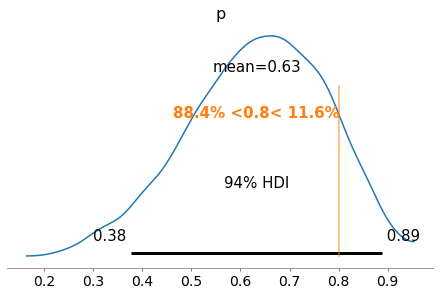

In [18]:
az.plot_posterior(trace,var_names = 'p',ref_val = 0.8)

3E3. How much posterior probability lies between p = 0.2 and p = 0.8? 

In [19]:
1 - (np.sum(samples<0.2) + np.sum(samples>0.8))/len(samples)

0.88375

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'p'}>

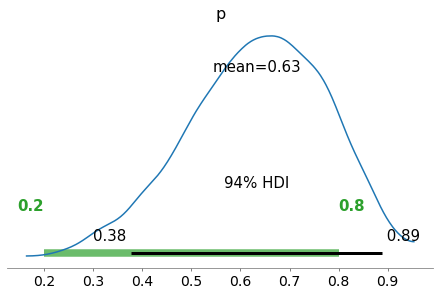

In [20]:
az.plot_posterior(trace, var_names = ['p'], rope = (0.2,0.8))

In [21]:
#using grid approximation
1 - (np.sum(samples2<0.2)/len(samples2) + np.sum(samples2>0.8)/len(samples2))

0.8777

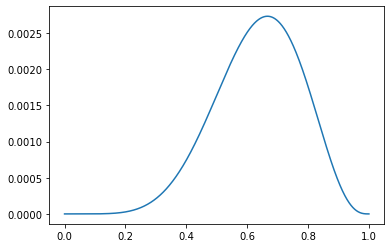

In [46]:
plt.plot(p2,posterior)

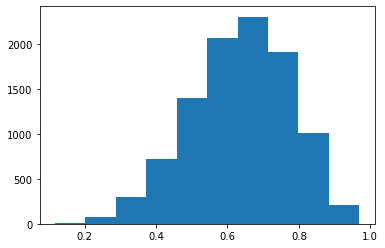

In [57]:
plt.hist(samples2);

In [82]:
(unique, counts) = np.unique(samples2, return_counts=True)

In [86]:
norm_counts = counts/np.sum(counts)

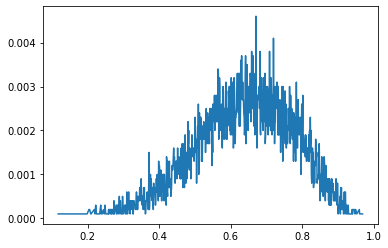

In [88]:
plt.plot(unique,norm_counts)

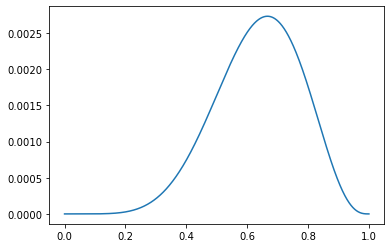

In [91]:
plt.plot(p2,posterior)

3E4. 20% of the posterior probability lies below which value of p?

In [22]:
np.quantile(samples,0.2)

0.513612709955971

In [23]:
np.quantile(samples2,0.2) #grid approximation gives similar solution

0.5185185185185185

In [59]:
# to confirm by doing it the other way
sum(samples2<0.5185185185185185), sum(samples2<0.5185185185185185)/len(samples2) 

(2010, 0.201)

3E5. 20% of the posterior probability lies above which value of p?

In [64]:
#Ans:
np.quantile(samples,0.8)

0.7589947083191951

In [92]:
# x,y = ECDF(samples2)

In [93]:
# plt.plot(x,y)

3E6. Which values of p contain the narrowest interval equal to 66% of the posterior probability?

In [95]:
#There's an infinite number of points between which you could find 66% of the posterior. 
# We want the narrowest.
# Turns out this is called highest density posterior interval. And, there's a function in arviz to do it

az.hdi(samples2,0.66)

array([0.53253253, 0.8018018 ])

In [96]:
az.hdi(samples,0.66)

array([0.51345002, 0.78605346])

3E7. Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [103]:
1/6, 5/6

(0.16666666666666666, 0.8333333333333334)

In [104]:
# np.percentile wants the range (0,100) for where to look
np.percentile(samples2,[16.6,83.3])

array([0.4984985 , 0.77677678])

In [105]:
# using quantile function with normalized values will give similar results
np.quantile(samples2, (1/6,5/6))

array([0.4994995 , 0.77677678])

3M1. Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

In [115]:
p3 = np.linspace(start = 0 , stop = 1, num = 100)
prior = 1
likelihood3 = stats.binom.pmf(n = 15, k = 8, p = p3)
posterior3 = prior * likelihood3
posterior3 /= np.sum(posterior3)

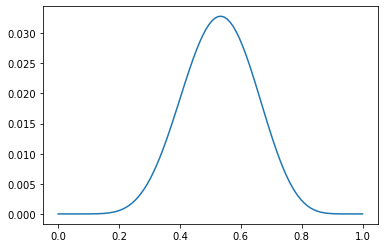

In [122]:
plt.plot(p3,posterior3)

3M2. Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

In [118]:
samples3 = np.random.choice(p3,p = posterior3, size = 10000, replace = True)

In [123]:
# az.plot_posterior(samples3)

In [120]:
az.hdi(samples3,0.9)

array([0.33333333, 0.72727273])

3M3. Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?

In [124]:
# what we want is take each p in our sample and calculate generate a 15 toss result from it
dist = np.random.binomial(n = 15, p = samples3) #this gives the n success in each

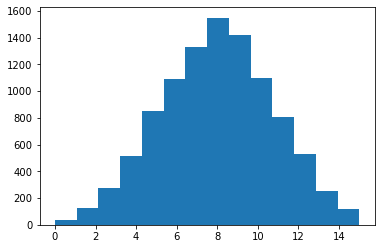

In [184]:
plt.hist(dist, bins = 14);

In [130]:
(unique3,counts3) = np.unique(dist,return_counts = True)

In [131]:
norm_counts3 = counts3/np.sum(counts3)

In [135]:
norm_counts3[8]

0.155

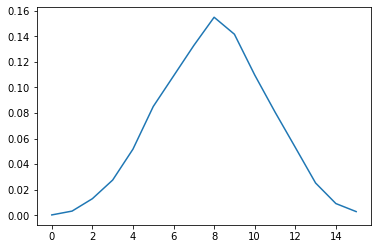

In [137]:
plt.plot(unique3,norm_counts3)

What does this value and graph mean?

Think about how we started all this: we started with a set of observations that told us we are getting 8 success in 15 trials. We then tried to evaluate what is our probability of success if this is the data we get (what probability of success generated this data). We got ourselve a probability distribtution in the end.

Now, after generating thousands of samples, we see 8 is the most common value. This makes sense given this is the observation we build our model upon.

#### A note on sampling from the posterior

When we run our model to produce the posterior, we calculate a likelihood that looks like:

likelihood = stats.binom.pmf(n = n, k = k, p = p)

where n -> num trials

k -> num successes

p -> possible values that p can take

and we calculate how likely each p value could produce our data (k successes in n trials).

We then multiply this by a prior (representing how much we were expecting each p before we see any data anyway) and multiply prior x likelihood to get a posterior representing how plausible (likely) we think each p value could be (our posterior / updated beliefs about p after we get information from the data).

Now, we want to make use of that information, so we sample the posterior (imagine our p values are marbles in a bag, some occur more than others and we draw blindly from the bag - eg 10000 draws and see how many we get out of each of the p values). How much each p will appear in our sample, should be in accordance to how likely (plausible) the posterior told us it would be.

Now, we can use each of these p values in a binomial to generate a new sample experimental data. This is what we did above.

3M4. Using the posterior distribution constructed from the new (8/15) data,now calculate the probability of observing 6 water in 9 tosses.

In [140]:
samples9 = np.random.binomial(n = 9, p = samples3)

In [146]:
# in one line
np.sum(samples9 == 6) / len(samples9)

0.1783

3M5. Start over at 3M1,but now use a prior that is zero below p=0.5 and a constant above p=0.5. This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value p = 0.7.

In [155]:
# n = 15, k = 8
p4 = np.linspace(start = 0, stop = 1, num = 1000)
prior4 = np.heaviside(p4-0.5,0.5)*2
likelihood4 = stats.binom.pmf(n = 15, k = 8, p = p4)
posterior4 = prior4 * likelihood4
posterior4 /= np.sum(posterior4)

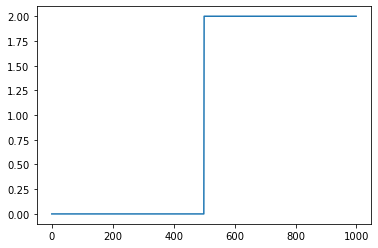

In [154]:
plt.plot(prior4);

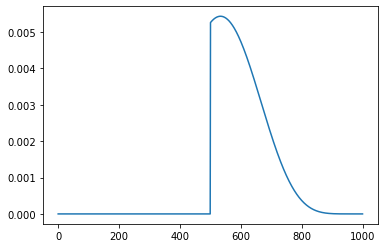

In [157]:
plt.plot(posterior4);

Questions to redo:

Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.


Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?

Using the posterior distribution constructed from the new (8/15) data,now calculate the probability of observing 6 water in 9 tosses.


In [163]:
#draw 10000 samples and calculate 90% HDI

samples4 = np.random.choice(p4, size = 10000, p = posterior4)

In [164]:
az.hdi(samples4, 0.9)

array([0.5005005 , 0.71171171])

In [165]:
# posterior predictive check 
ppd = np.random.binomial(n = 15, p = samples4)

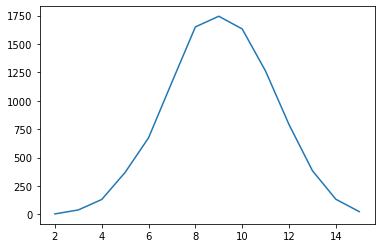

In [172]:
(unique4,counts4) = np.unique(ppd,return_counts = True)
plt.plot(unique4,counts4);

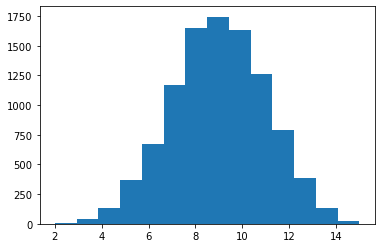

In [183]:
plt.hist(ppd, bins = 14);

In [174]:
#  probability of observing 8 water in 15 tosses
np.sum(ppd==8) / len(ppd)

0.165

In [175]:
#  calculate the probability of observing 6 water in 9 tosses.
samples94 = np.random.binomial(n = 9, p = samples4)
np.sum(samples94 == 6) / len(samples94)

0.2301

#### Thoughts on the results

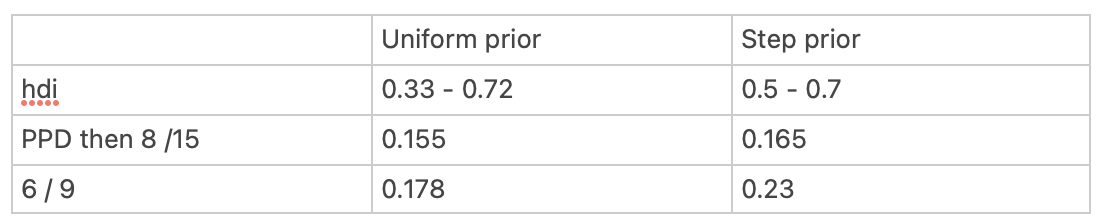

The HDI result: We see a narrower credibility interval starting from 0.5 since we no longer think that earth could have < 50% water.

And despite that the data says 8 / 15 successes, the ppd no longer has 8 at its center. The prior gives it other information that make it compete with what the data is saying.

3M6. Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this?

In [198]:
import time

0.07070707070707072

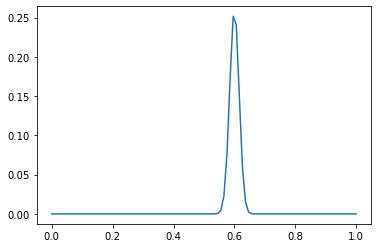

In [214]:
# start = time.time()
px = np.linspace(start = 0, stop = 1, num = 100)
prior = 1 #uniform prior
likelihood = stats.binom.pmf(k = 600, n = 1000, p = px)
posterior = prior * likelihood
posterior /= np.sum(posterior)
samplesx = np.random.choice(px,p = posterior, size = 10000)
a,b = az.hdi(samplesx,0.99)
interval = b - a
# end = time.time()
plt.plot(px,posterior);
interval

In [203]:
dt = end - start
dt

0.002012968063354492

In [ ]:
#let's try to get this using a smiluation approach
# we'll also be smart and use prior information from or simulation above: when num_trials
n = 1
while interval > 0.05:
    likelihood = stats.binom.pmf(k = 7000, n = 10000, p = px)
    posterior = prior * likelihood
    posterior /= np.sum(posterior)
    samplesx = np.random.choice(px,p = posterior, size = 10000)
    a,b = az.hdi(samplesx,0.99)
    interval = b - a
    